In [48]:
# Импорт библиотек
import numpy
import pandas as pd

In [49]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [50]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/USER/Documents/Python/_Python_part_2/Lecture_4_02/monthly car sales in Quebec")


In [51]:
# Импорт обучающей выборки
sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])


In [52]:
#  Знакомимся с данными
sales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [53]:
#  Знакомимся с данными
sales.shape

(108, 2)

In [54]:
#  Знакомимся с данными
sales.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


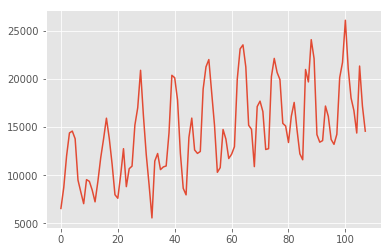

In [56]:
#  График, чтобы ответить на 4 вопроса
sales.iloc[:,1].plot()


In [58]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i)

sales_2['t'] = sales.iloc[:,1].values

print(sales_2.head(13))




      t-12    t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
0      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5      NaN     NaN      NaN      NaN      NaN      NaN      NaN   6550.0   
6      NaN     NaN      NaN      NaN      NaN      NaN   6550.0   8728.0   
7      NaN     NaN      NaN      NaN      NaN   6550.0   8728.0  12026.0   
8      NaN     NaN      NaN      NaN   6550.0   8728.0  12026.0  14395.0   
9      NaN     NaN      NaN   6550.0   8728.0  12026.0  14395.0  14587.0   
10     NaN     NaN   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   
11     NaN  6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0   
12  6550.0  

In [59]:
#  Отрезаем первые 12 строк
sales_4 = sales_2[12:]

sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


In [60]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [68]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [70]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 12)
(91,)
(5, 12)
(5,)


In [64]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9      t-8      t-7     t-6     t-5  \
12   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0  9498.0  8251.0   
13   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0  8251.0  7049.0   
14  12026.0  14395.0  14587.0  13791.0   9498.0   8251.0  7049.0  9545.0   
15  14395.0  14587.0  13791.0   9498.0   8251.0   7049.0  9545.0  9364.0   
16  14587.0  13791.0   9498.0   8251.0   7049.0   9545.0  9364.0  8456.0   

       t-4     t-3      t-2      t-1  
12  7049.0  9545.0   9364.0   8456.0  
13  9545.0  9364.0   8456.0   7237.0  
14  9364.0  8456.0   7237.0   9374.0  
15  8456.0  7237.0   9374.0  11837.0  
16  7237.0  9374.0  11837.0  13784.0  


In [71]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [72]:
from keras.models import Sequential
from keras.layers import Dense


C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [106]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
91/91 [==============================] - 0s 3ms/step - loss: 108496367.2967 - mean_absolute_percentage_error: 56.5563
Epoch 2/300
91/91 [==============================] - 0s 77us/step - loss: 90453147.1648 - mean_absolute_percentage_error: 50.1910
Epoch 3/300
91/91 [==============================] - 0s 77us/step - loss: 75136366.5934 - mean_absolute_percentage_error: 43.8720
Epoch 4/300
91/91 [==============================] - 0s 77us/step - loss: 60638790.2857 - mean_absolute_percentage_error: 38.4570
Epoch 5/300
91/91 [==============================] - 0s 88us/step - loss: 48566127.5165 - mean_absolute_percentage_error: 33.5977
Epoch 6/300
91/91 [==============================] - 0s 110us/step - loss: 39479112.5714 - mean_absolute_percentage_error: 30.3322
Epoch 7/300
91/91 [==============================] - 0s 88us/step - loss: 32997532.6593 - mean_absolute_percentage_error: 28.4704
Epoch 8/300
91/91 [==============================] - 0s 99us/step - loss: 28489582.2418 -

91/91 [==============================] - 0s 66us/step - loss: 6903085.3956 - mean_absolute_percentage_error: 15.0860
Epoch 126/300
91/91 [==============================] - 0s 77us/step - loss: 6839766.2912 - mean_absolute_percentage_error: 15.0391
Epoch 127/300
91/91 [==============================] - 0s 66us/step - loss: 6783528.3242 - mean_absolute_percentage_error: 14.9805
Epoch 128/300
91/91 [==============================] - 0s 66us/step - loss: 6730076.9505 - mean_absolute_percentage_error: 14.9281
Epoch 129/300
91/91 [==============================] - 0s 66us/step - loss: 6685416.5110 - mean_absolute_percentage_error: 14.8941
Epoch 130/300
91/91 [==============================] - 0s 66us/step - loss: 6627639.3187 - mean_absolute_percentage_error: 14.8394
Epoch 131/300
91/91 [==============================] - 0s 176us/step - loss: 6567799.7692 - mean_absolute_percentage_error: 14.8341
Epoch 132/300
91/91 [==============================] - 0s 66us/step - loss: 6526751.5055 - mean_

91/91 [==============================] - 0s 66us/step - loss: 4147162.2473 - mean_absolute_percentage_error: 12.0289
Epoch 250/300
91/91 [==============================] - 0s 66us/step - loss: 4137388.4505 - mean_absolute_percentage_error: 12.0781
Epoch 251/300
91/91 [==============================] - 0s 88us/step - loss: 4138138.2637 - mean_absolute_percentage_error: 12.0823
Epoch 252/300
91/91 [==============================] - 0s 143us/step - loss: 4125467.1923 - mean_absolute_percentage_error: 12.0492
Epoch 253/300
91/91 [==============================] - 0s 88us/step - loss: 4129192.2088 - mean_absolute_percentage_error: 12.0172
Epoch 254/300
91/91 [==============================] - 0s 77us/step - loss: 4114978.7582 - mean_absolute_percentage_error: 12.0167
Epoch 255/300
91/91 [==============================] - 0s 110us/step - loss: 4107376.8764 - mean_absolute_percentage_error: 11.9981
Epoch 256/300
91/91 [==============================] - 0s 88us/step - loss: 4100859.3929 - mean

In [107]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

5/5 [==============================] - 0s 23ms/step

MAPE: 11.02%


In [109]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [110]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [ ]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


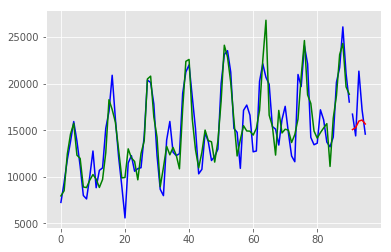

In [111]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶

x2 = numpy.arange(0, 91, 1)

x3 = numpy.arange(91, 96, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')

